Import Modules



In [8]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


Load the dataset

In [26]:
train = pd.read_csv("/content/Train.csv")
train


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [27]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [12]:
test = pd.read_csv("/content/Test.csv")
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [28]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [29]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [16]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB
None


In [30]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [31]:
train.fillna(train.mean(),inplace=True)
train.isnull().sum()

<ipython-input-31-8395cca6d7d7>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.fillna(train.mean(),inplace=True)


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [20]:
test.fillna(test.mean(),inplace=True)
test.isnull().sum()

<ipython-input-20-736e4e11a7dd>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test.fillna(test.mean(),inplace=True)


Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [32]:
#filling the string values with mode
train=train.drop(['Item_Identifier'],axis=1)
train_cat_col = train.select_dtypes(include=('object')).columns
for c in train_cat_col:
    train[c].fillna(train[c].mode().values[0], inplace=True)

train.select_dtypes(include=('object')).isna().sum()

Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [33]:
test=test.drop(['Item_Identifier'],axis=1)
test_cat_col = test.select_dtypes(include=('object')).columns
for c in test_cat_col:
    test[c].fillna(test[c].mode().values[0], inplace=True)

test.select_dtypes(include=('object')).isna().sum()
     

Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

In [35]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'Low Fat':0,'Regular':1,'LF':0,'reg':1,'low fat':0})  
test['Item_Fat_Content'] = test['Item_Fat_Content'].replace({'Low Fat':0,'Regular':1,'LF':0,'reg':1,'low fat':0})  

In [36]:
train['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [37]:
train['Item_Fat_Content'].value_counts()

0    5517
1    3006
Name: Item_Fat_Content, dtype: int64

In [39]:
train['Item_Type'].value_counts()
     

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [41]:
train['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [43]:
train['Outlet_Type'].value_counts()
     

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [45]:
encoder = LabelEncoder()
train['Item_Fat_Content'] = encoder.fit_transform(train['Item_Fat_Content'])
train['Item_Type'] = encoder.fit_transform(train['Item_Type'])
train['Outlet_Identifier'] = encoder.fit_transform(train['Outlet_Identifier'])
train['Outlet_Size'] = encoder.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = encoder.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type'] = encoder.fit_transform(train['Outlet_Type'])

In [47]:
print('Number of trainings examples:', len(train),'\n')
train.describe()
     

Number of trainings examples: 8523 



,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


<ipython-input-49-b282a6c9500a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Item_Weight'])


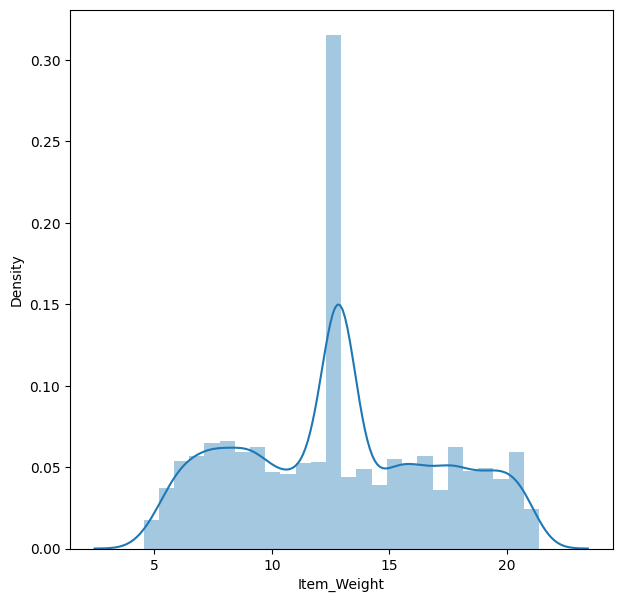

In [49]:
# Item_Weight distribution
plt.figure(figsize=(7,7))
sns.distplot(train['Item_Weight'])
plt.show()
     

<ipython-input-50-78977d641e47>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Item_Visibility'])


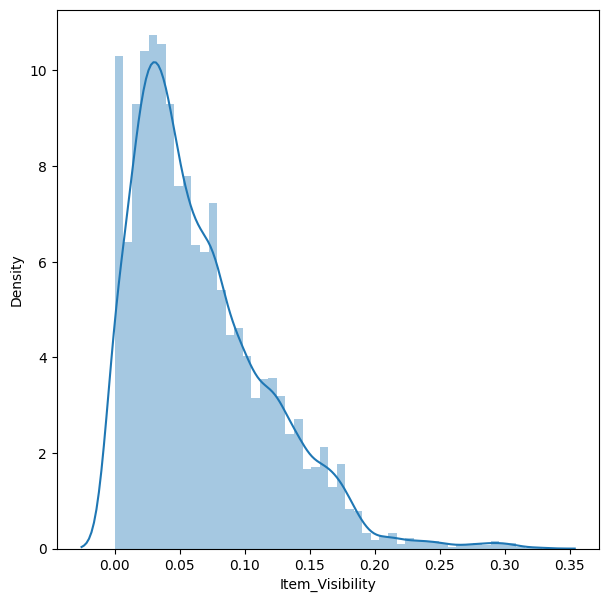

In [50]:
plt.figure(figsize=(7,7))
sns.distplot(train['Item_Visibility'])
plt.show()

<ipython-input-51-9f066c3652cf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Item_MRP'])


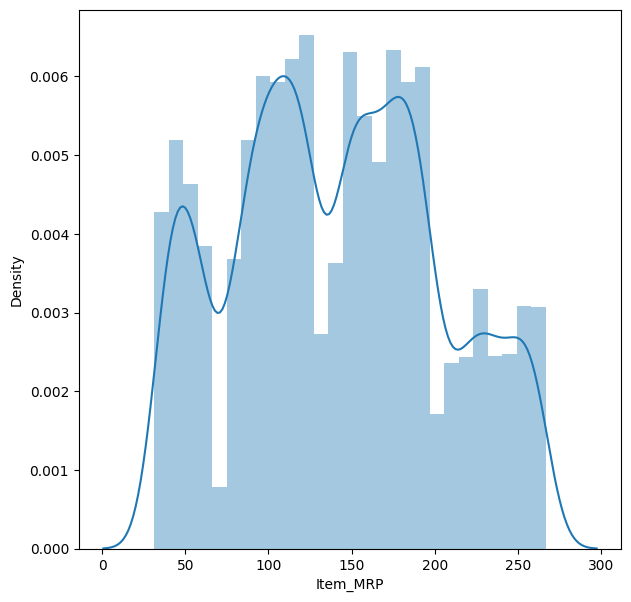

In [51]:
# Item_MRP distribution
plt.figure(figsize=(7,7))
sns.distplot(train['Item_MRP'])
plt.show()


<ipython-input-52-c23401e50f17>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Item_Outlet_Sales'])


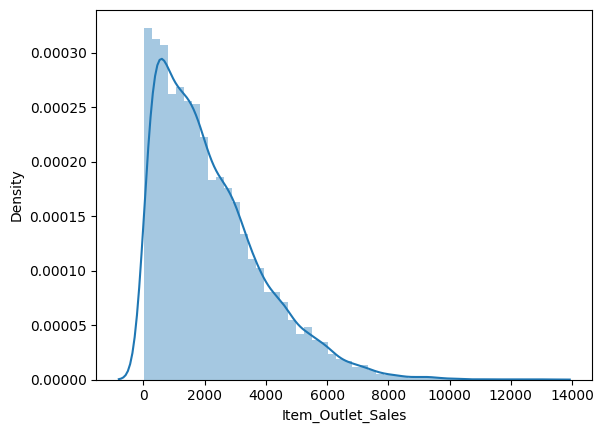

In [52]:

# Item_Outlet_Sales distribution
train['Item_Outlet_Sales'].describe()
sns.distplot(train['Item_Outlet_Sales'])
plt.show()


<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

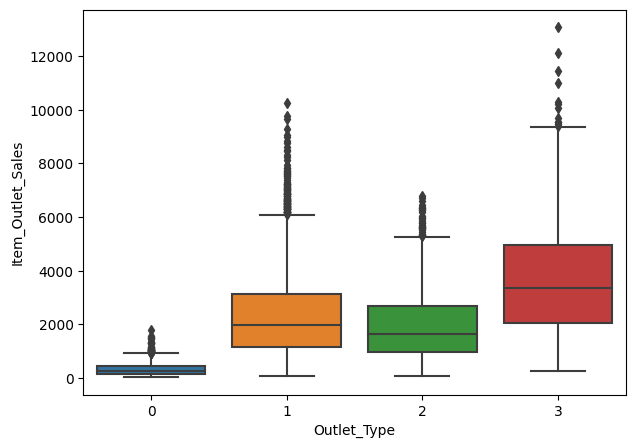

In [66]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train)
     

<Axes: xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

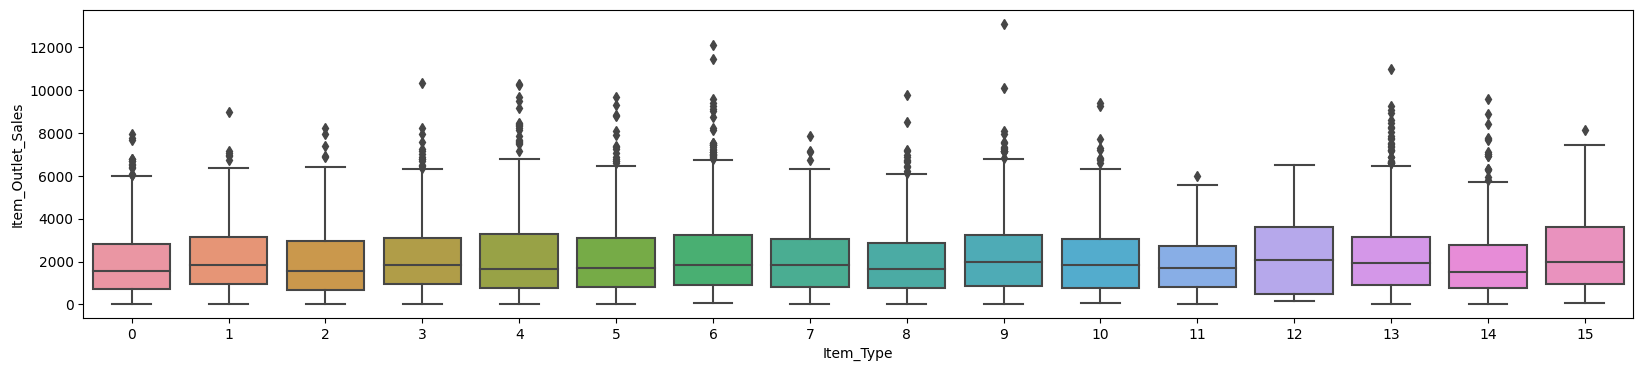

In [68]:
# Outlier Analysis
plt.figure(figsize=(20,4))
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=train)
     

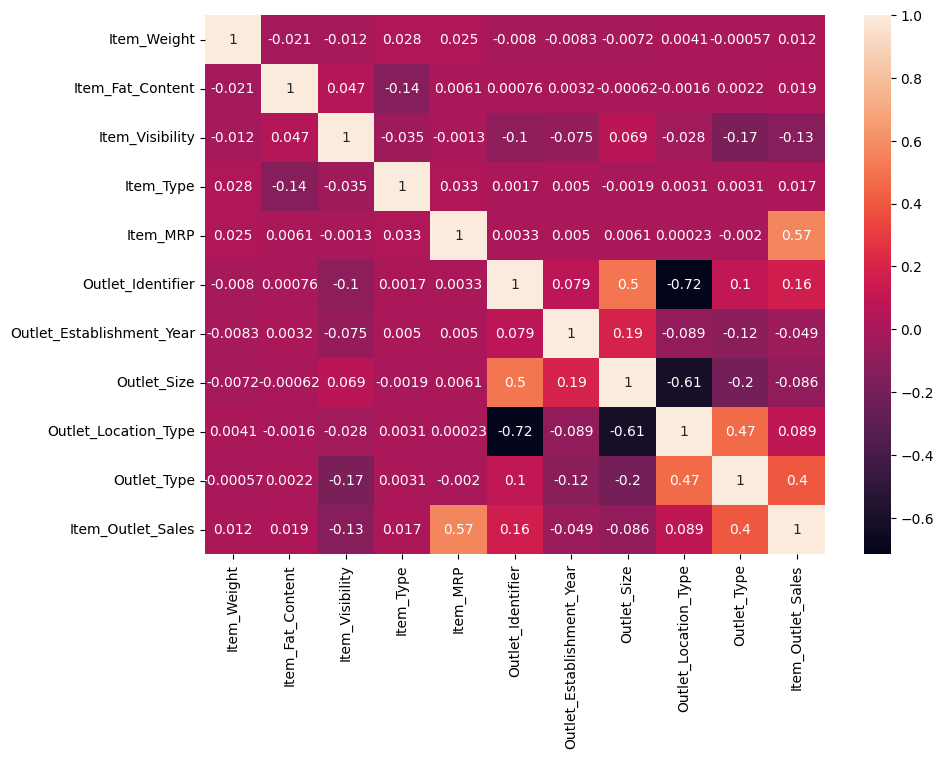

In [69]:
# Correlation matrix
plt.figure(figsize=(10,7))
corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [71]:
# Compute the Z-scores for each column in the dataset
z_scores = np.abs((train - train.mean()) / train.std())
# Remove the rows that contain outliers
train = train[(z_scores < 3).all(axis=1)]


In [73]:
z_scores.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.837127,0.736601,1.011447,0.766543,1.771725,1.495923,0.120542,0.278857,1.370263,0.259823,1.012965
1,1.631938,1.357425,0.943263,1.610075,1.482850,0.614985,1.322644,0.278857,1.098994,1.022073,1.070187
2,1.091111,0.736601,0.996405,0.659427,0.024596,1.495923,0.120542,0.278857,1.370263,0.259823,0.023555
3,1.490868,1.357425,1.350100,0.291220,0.678240,1.670439,0.000332,0.278857,1.098994,1.541719,0.887321
4,0.924133,0.736601,1.350100,0.421766,1.392544,1.318621,1.321981,1.940838,1.098994,0.259823,0.721309


In [75]:
X=pd.DataFrame(train.iloc[:,: -1].values)
X.head()
     

,0,1,2,3,4,5,6,7,8,9
0,9.30,0.0,0.016047,4.0,249.8092,9.0,1999.0,1.0,0.0,1.0
1,5.92,1.0,0.019278,14.0,48.2692,3.0,2009.0,1.0,2.0,2.0
2,17.50,0.0,0.016760,10.0,141.6180,9.0,1999.0,1.0,0.0,1.0
3,19.20,1.0,0.000000,6.0,182.0950,0.0,1998.0,1.0,2.0,0.0
4,8.93,0.0,0.000000,9.0,53.8614,1.0,1987.0,0.0,2.0,1.0


In [77]:
y=pd.DataFrame(train.iloc[:,-1].values)
y.head()
     


,0
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052


In [79]:
#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X.shape, X_train.shape, X_test.shape
     

((8262, 10), (6609, 10), (1653, 10))

In [81]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [83]:
y_pred = reg.predict(X_test)

In [84]:
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

Coefficients: [[  -1.88234447   54.54137141 -982.40316105    1.4338867    14.33123065
    60.65204094    4.7887765  -369.03958323 -231.95237715  779.67665766]]
Intercept: [-9939.51158285]


In [85]:
r2=metrics.r2_score(y_test,y_pred)
print('R squared value = ',r2)

R squared value =  0.5245210832018978


In [87]:

print('Accuracy :' , r2*100)

Accuracy : 52.45210832018978


In [91]:
reg=RandomForestRegressor()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
r2=metrics.r2_score(y_test,y_pred)
print('R squared value = ',r2)


<ipython-input-91-75d17d096400>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(X_train, y_train)


R squared value =  0.5568580933513163


In [93]:

print('Accuracy :' , r2*100)


Accuracy : 55.68580933513163


In [95]:
reg=XGBRegressor()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
r2=metrics.r2_score(y_test,y_pred)
print('R squared value = ',r2)

R squared value =  0.5233598744740561


In [96]:
print('Accuracy :' , r2*100)

Accuracy : 52.33598744740561
